# Final project

## Employee churn prediction

In [605]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Reading the data

In [606]:
data = pd.read_csv('turnover.csv', encoding='latin-1')

In [607]:
data.shape

(1129, 16)

### Data exploration

In [608]:
# Preview the data
data.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


 <h1> Information about dataset </h1>

- stag - work experience (time) 
- event - employee churn 
- gender,	age, industry, profession - employee gender, age, industry, profession 
- traffic - source of hire 
- coach - presence of a coach on probation 
- head_gender - head gender 
- greywage - type of wage(taxing or no) 
- way - way of transportation  

##### The Big Five Personality Test results(OCEAN) 
- novator - Openness (բացություն փորձին)
- selfcontrol - Conscientiousness (պլանավորում)
- extraversion - Extraversion 
- independ - reverse Agreeableness(բարյացակամություն, հարմարվողականություն) 
- anxiety - Neuroticism(զայրույթ, տագնապ)

In [609]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


#### Statistics for columns with object type


In [610]:
data.describe(include=['object'])

,gender,industry,profession,traffic,coach,head_gender,greywage,way
count,1129,1129,1129,1129,1129,1129,1129,1129
unique,2,16,15,8,3,2,2,3
top,f,Retail,HR,youjs,no,m,white,bus
freq,853,289,757,318,683,584,1002,681


#### The distribution of numerical feature values

In [611]:
data.describe()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,36.627526,0.505757,31.066965,5.592383,5.478034,5.597254,5.665633,5.879628
std,34.096597,0.500188,6.996147,1.851637,1.703312,1.980101,1.709176,1.904016
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,11.728953,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,24.344969,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,51.318275,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,179.449692,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000


###### Changing names  of some features

In [612]:
df = data.copy() # making a copy of the original sourcefile

# multiple columns names changed by adding elements to dict
df = df.rename(columns={'stag': 'experience', 'event': 'churn', 'greywage': 'wage_type'})

In [613]:
df

,experience,churn,gender,age,industry,profession,traffic,coach,head_gender,wage_type,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,f,34.0,Telecom,Accounting,KA,no,f,white,bus,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,f,51.0,Consult,HR,empjs,no,m,grey,bus,3.8,7.6,5.7,6.3,5.2


### Data cleaning 

#### Checking for missing data

In [614]:
df.isnull().sum()

experience      0
churn           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
wage_type       0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

#### Checking for duplicates 

In [615]:
df.duplicated().sum()

13

In [616]:
# drop duplicated rows
df = df.drop_duplicates()
df.duplicated().sum()

0

#### Checking for single valued columns

In [617]:
df.columns[data.nunique()==1]

Index([], dtype='object')

###  Descriptive analitics

### Churn rate

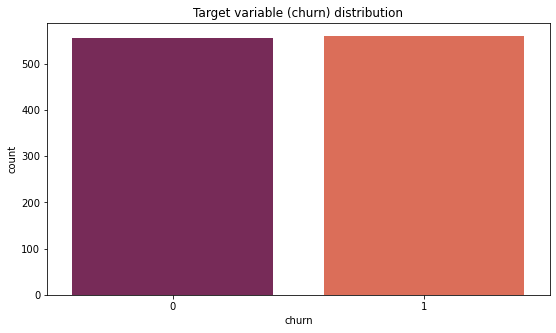

In [618]:
plt.figure(figsize=(9,5))
sns.countplot(df.churn, palette = "rocket")
plt.title("Target variable (churn) distribution")
plt.show()

As the countplot reveals our dataset is balanced.
Number of employees who churned and employees who stayed are almost equal 

In [619]:
# churn rate by percentages
df.churn.value_counts(normalize=True).mul(100)

1    50.179211
0    49.820789
Name: churn, dtype: float64

### Difference of age in churn and no churn groups 

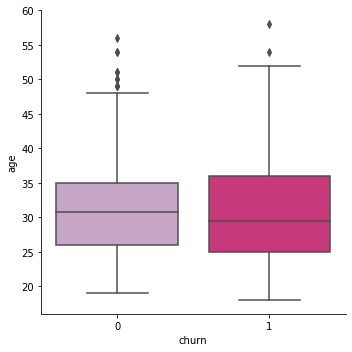

In [620]:
sns.catplot(y = "age", x = 'churn', kind="box", data=df, palette = 'PuRd')

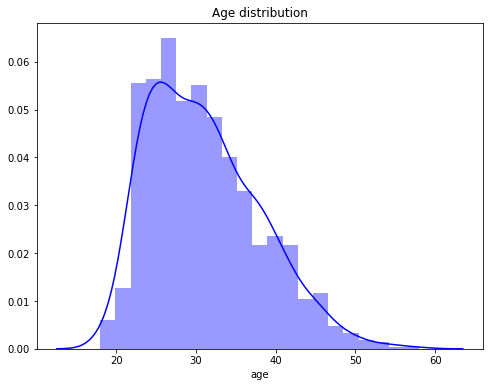

In [621]:
plt.figure(figsize=(8,6))
sns.distplot(df.age,color='blue')
plt.title('Age distribution')
plt.show()

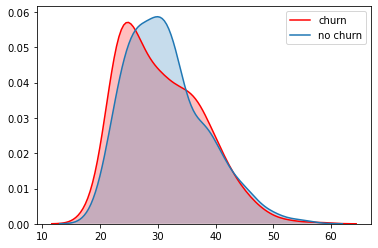

In [622]:
#(KDE) plot colored by the value of the target.
sns.kdeplot(df.loc[df['churn'] == 1, 'age'], label = 'churn', shade=True, color = 'Red')
sns.kdeplot(df.loc[df['churn'] == 0, 'age'] , label = 'no churn', shade=True)

### T-test to indetify if there is significant difference of age in churn and no churn groups

There is difference in ages of employees in churn and no churn groups. But is that significant? significance level = 0.05 
- H0: (mu1 - mu2) = 0, there is no difference 
- HA: (mu1 - mu2) != 0 

In [623]:
from scipy import stats
a = df.loc[df['churn'] == 1, 'age']
b = df.loc[df['churn'] == 0, 'age']
tStat, pValue = stats.ttest_ind(a, b, equal_var = False) #T-Test
print(f'P-Value:', pValue, f'T-Statistic:', tStat) #print the P-Value and the T-Statistics

P-Value: 0.07400178868519351 T-Statistic: -1.788286911842796


Our p-value of 0,074 is larger than 0.05, so we cannot reject our null hypothesis and we cannot accept alternative.

### Object type columns exploration 

In [624]:
rates_list=[]
for i in df.dtypes[df.dtypes=="object"].index.tolist():
    rates=df.groupby(i)["churn"].value_counts(normalize=True).rename("percentage").mul(100).reset_index()
    rates_list.append(rates)
    

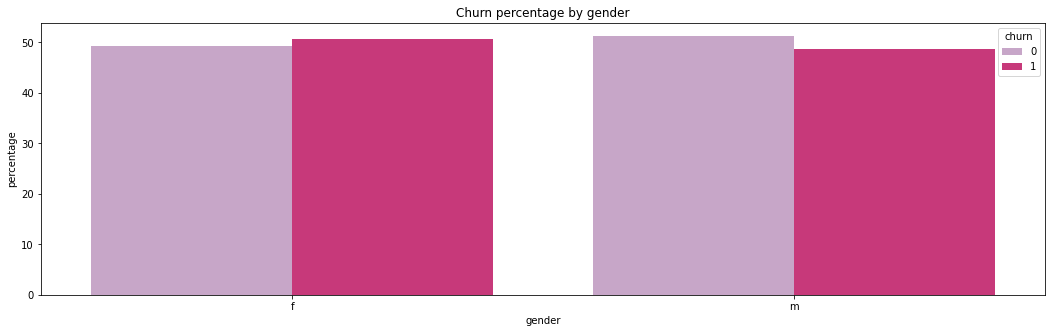

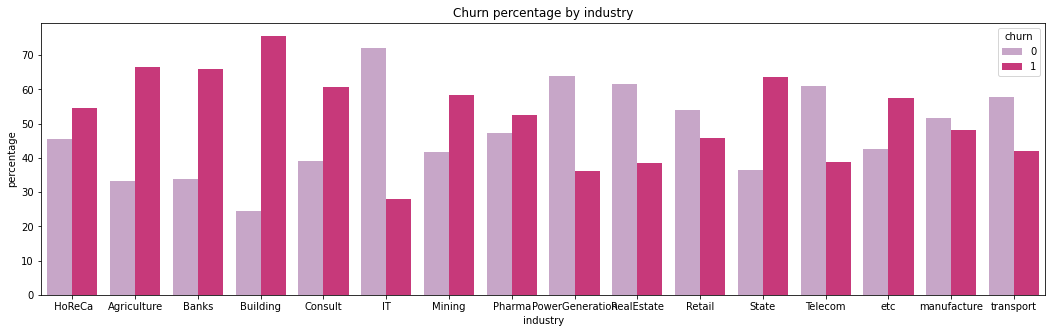

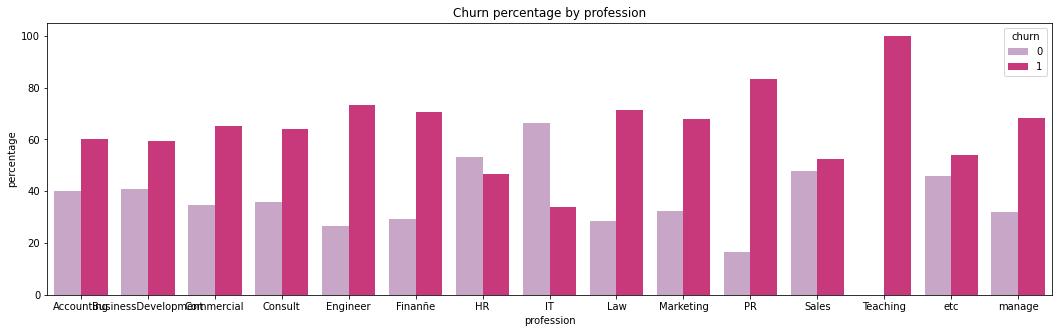

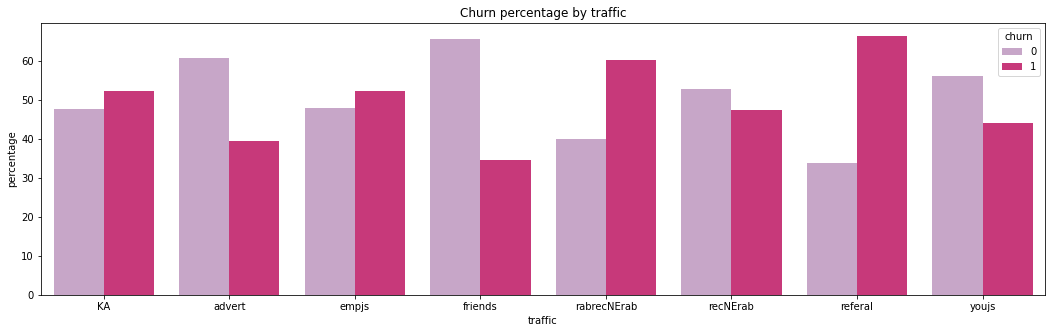

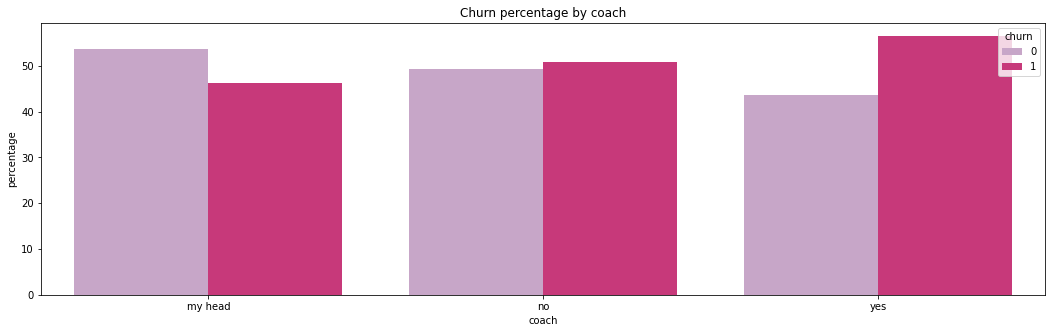

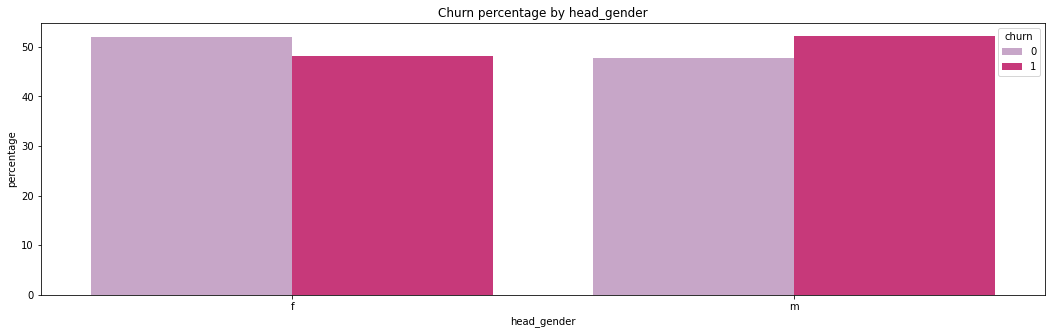

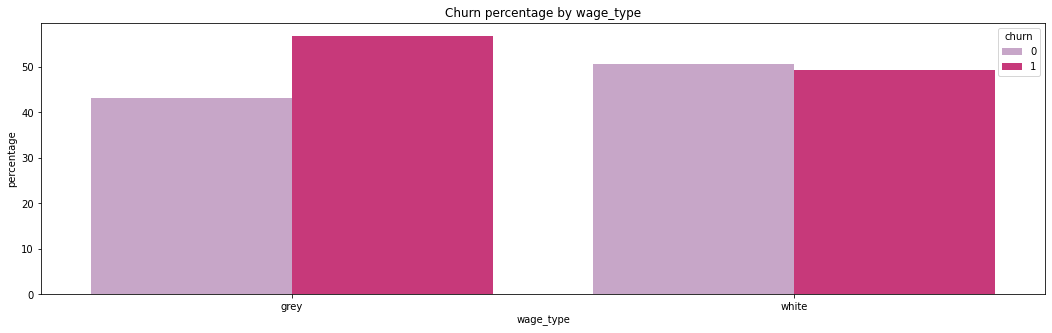

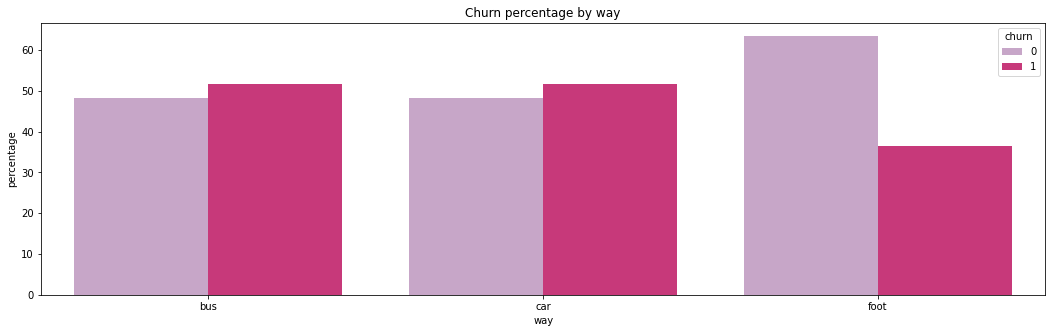

In [625]:
for i in rates_list:
    plt.figure(figsize=(18,5))
    sns.barplot(x=i.iloc[:,0], y=i.iloc[:,2], hue=i.iloc[:,1], palette = 'PuRd')
    plt.title(f'Churn percentage by ' + i.columns[0])
    plt.show()


- There is not obvious difference in gender groups
- Buliding employees mainly churn - more than 75%. About 70% workers in agriculture, banks and state also churn.
Most employees do not churn in IT - about 70% workers stay, which is the best result by industry. 
- By proffession most churn percentage is in PR (more than 80%), and least churn in IT and HR - about 60%
- By traffic, it is interesting that employees who came due to friends tend to no churn (more than 60% stayed)
- There is not big difference in coach, head gender groups
- By wage type, people who earn grey wage tend to leave company (more than 60%)
- By way, people who came to work mostly do not churn (more than 60%), which is logical

### Distributions of personality test results and exprience

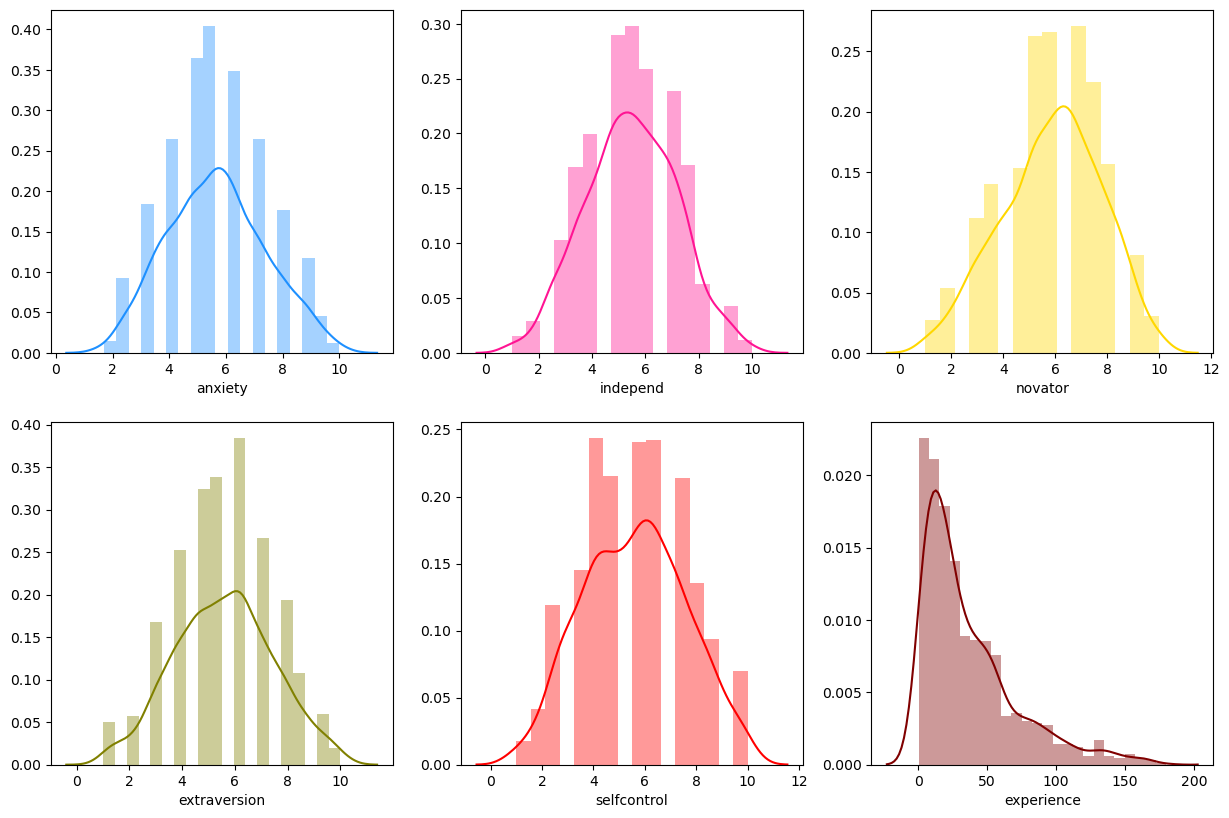

In [626]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=100)
sns.distplot(df['anxiety'] , color="dodgerblue",ax=axes[0,0])
sns.distplot(df['independ'] , color="deeppink", ax=axes[0,1])
sns.distplot(df['novator'] , color="gold", ax=axes[0,2])
sns.distplot(df['extraversion'] , color='olive', ax=axes[1,0])
sns.distplot(df['selfcontrol'] , color='red', ax=axes[1,1])
sns.distplot(df['experience'] , color='maroon', ax=axes[1,2])

### Difference of anxiety in churn and no churn groups 

In [627]:
df[['churn', 'anxiety']].groupby(['churn'], as_index=False).mean().sort_values(by='anxiety', ascending=False)

,churn,anxiety
0,0,5.772842
1,1,5.561250


Surprisingly, average estimate of anxiety in no churn group is higher 

### T-test to indetify if there is significant difference of anxiety in churn and no churn groups

As we saw, there is difference of anxiety in churn and no churn groups, but is that significant? 
- H0: (mu1 - mu2) = 0, there is no difference 
- HA: (mu1 - mu2) != 0

In [628]:
a = df.loc[df['churn'] == 1, 'anxiety']
b = df.loc[df['churn'] == 0, 'anxiety']
tStat, pValue = stats.ttest_ind(a, b, equal_var = False) #T-Test
print(f'P-Value:', pValue, f'T-Statistic:', tStat) #print the P-Value and the T-Statistics

P-Value: 0.038794025428009346 T-Statistic: -2.0688127417871045


Our p-value of 0,03 is larger than 0,05, so we can reject our null hypothesis, there is significant difference of anxiety

### Correlation Matrix

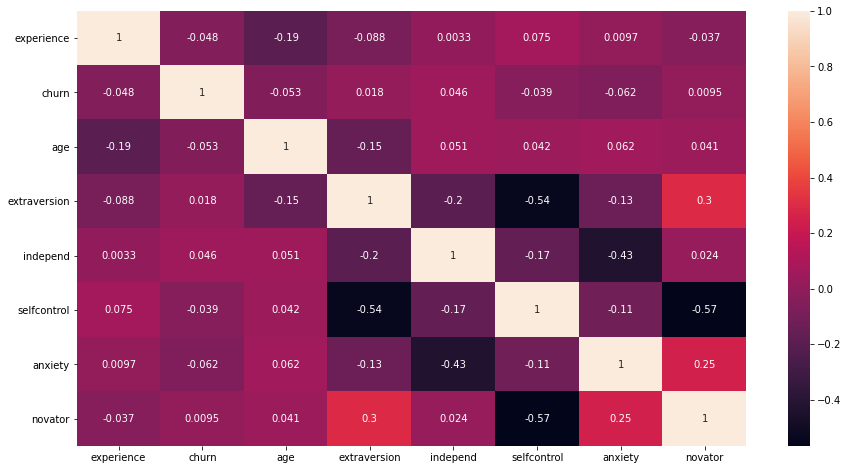

In [629]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

- There are correlations between personality test results, which is expectable. Selfcontrol and novator are negatively correlated, surprisingly anxiety and independ are also negatively correlated, same is for extraversion and selfcontrol
- As we can see from the heatmap there are not high correlated variables in our dataset, hence we will not drop any column by now


### Differences of average test results in churn and no churn groups

In [630]:
df1 = df[['churn', 'independ']].groupby(['churn'], as_index=False).mean().sort_values(by='independ', ascending=False)
df2 = df[['churn', 'selfcontrol']].groupby(['churn'], as_index=False).mean().sort_values(by='selfcontrol', ascending=False)
df3 = df[['churn', 'extraversion']].groupby(['churn'], as_index=False).mean().sort_values(by='extraversion', ascending=False)
df4 = df[['churn', 'novator']].groupby(['churn'], as_index=False).mean().sort_values(by='novator', ascending=False)
pd.concat([df1, df2, df3, df4], axis=1)

,churn,independ,churn,selfcontrol,churn,extraversion,churn,novator
0,0,5.395863,0,5.685791,0,5.556835,0,5.859173
1,1,5.552500,1,5.529821,1,5.622143,1,5.895357


There is no significant difference 

### Feature Engineering
### Making personality test results categorical estimates

In [631]:
df = df.copy()

df['novator'] = np.where((df['novator']<=3),'insufficient',np.where(df['novator']>=8,'great','sufficient'))

df['selfcontrol'] = np.where((df['selfcontrol']<=3),'insufficient',np.where(df['selfcontrol']>=8,'great','sufficient'))

df['anxiety'] = np.where((df['anxiety']<=3),'great',np.where(df['anxiety']>=8,'insufficient','suffficient'))

df['extraversion'] = np.where((df['extraversion']<=3),'insufficient',np.where(df['extraversion']>=8,'great','sufficient'))

df['independ'] = np.where((df['independ']<=3),'great',np.where(df['independ']>=8,'insufficient','suffficient'))


### Making new dataframe for test results

In [632]:
df_B5 = df[['novator', 'selfcontrol', 'anxiety', 'extraversion', 'independ', 'churn']]
df_B5.dtypes

novator         object
selfcontrol     object
anxiety         object
extraversion    object
independ        object
churn            int64
dtype: object

### Churn persentage by test results

In [633]:
rates_list=[]
for i in df_B5.dtypes[df_B5.dtypes=="object"].index.tolist():
    rates=df_B5.groupby(i)["churn"].value_counts(normalize=True).rename("percentage").mul(100).reset_index()
    rates_list.append(rates)
    

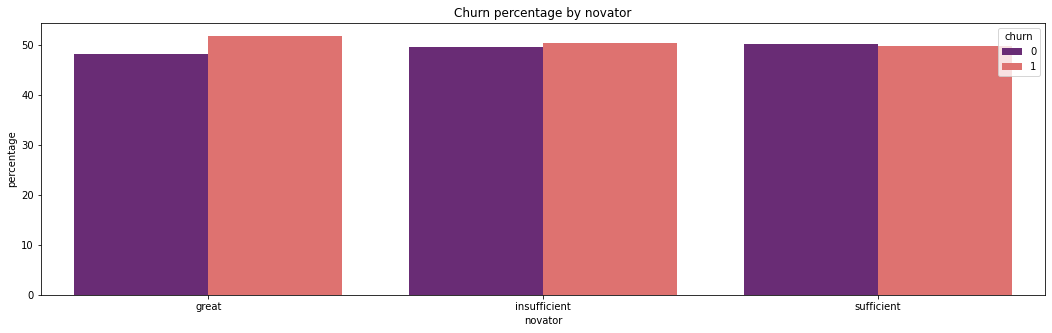

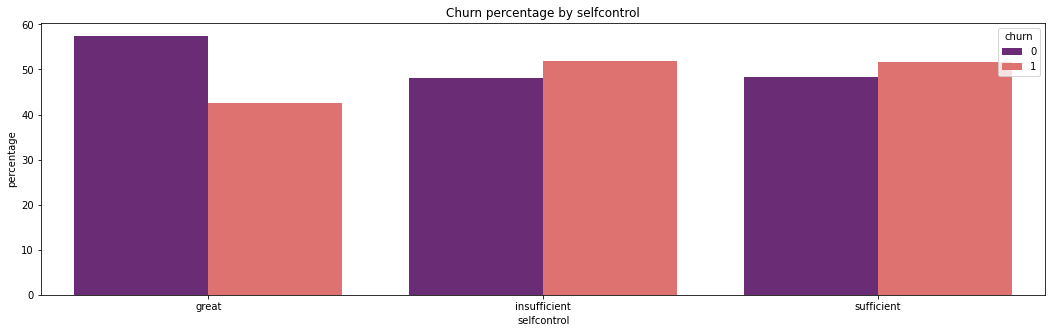

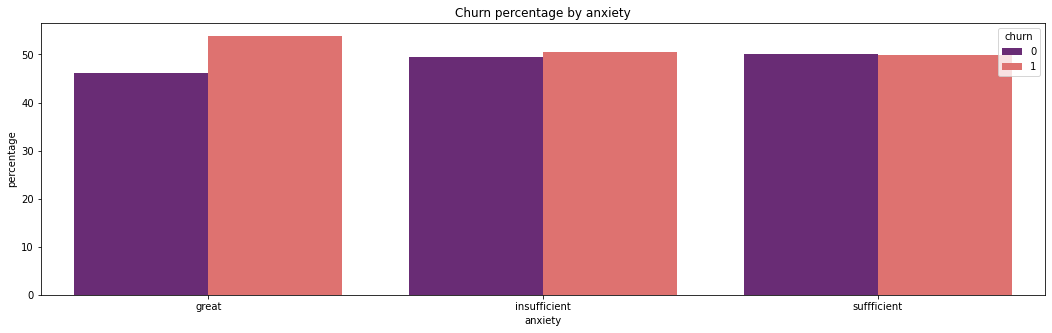

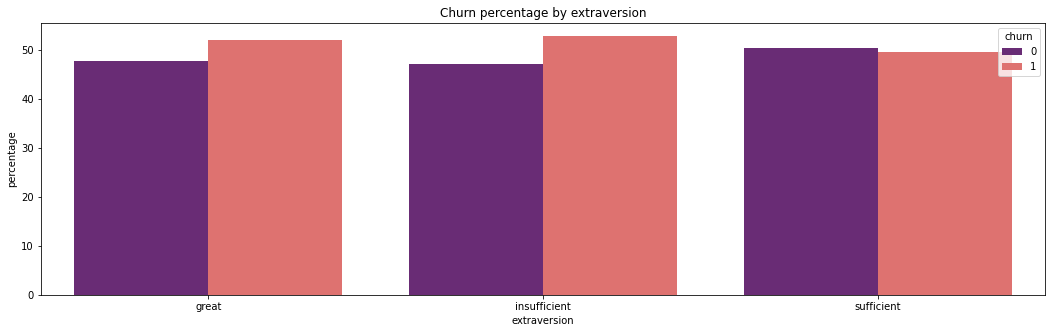

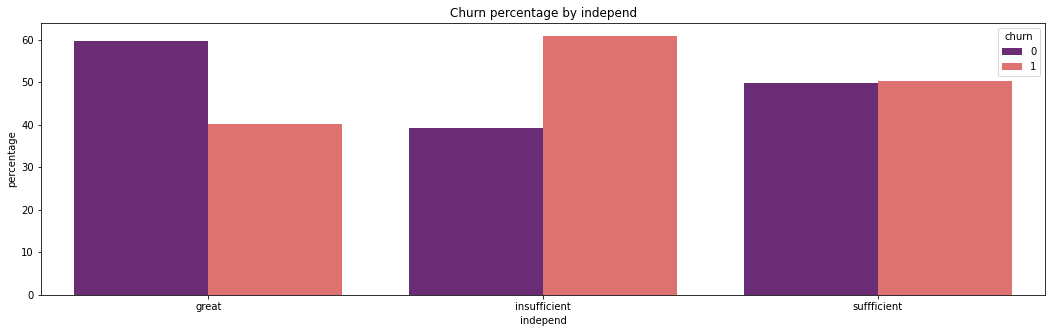

In [634]:
for i in rates_list:
    plt.figure(figsize=(18,5))
    sns.barplot(x=i.iloc[:,0], y=i.iloc[:,2], hue=i.iloc[:,1], palette = 'magma')
    plt.title(f'Churn percentage by ' + i.columns[0])
    plt.show()

- Employees with great mark of selfcontrol mainly do not churn
- Employees who are very indepent, with less aggreeblnees tend not to churn, meanwhile aggreeble workers churn more

### Drop unreliable column stag/experience

In [635]:
df = df.drop(['experience'], axis=1)

### Logistic reggression

#### Libraries for modelling and evaluation

In [636]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

#### Creating dummy variables 

In [637]:
df = pd.get_dummies(df,drop_first=True)

#### Separating Feature and Target matrices

In [638]:
#separating X and Y
Y = df["churn"]
X = df.drop("churn",axis=1)

# we need to add the intercept to data (X) manually
X = sm.add_constant(X)
X

,const,age,gender_m,industry_Agriculture,industry_Banks,industry_Building,industry_Consult,industry_IT,industry_Mining,industry_Pharma,...,extraversion_insufficient,extraversion_sufficient,independ_insufficient,independ_suffficient,selfcontrol_insufficient,selfcontrol_sufficient,anxiety_insufficient,anxiety_suffficient,novator_insufficient,novator_sufficient
0,1.0,35.0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
1,1.0,33.0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
2,1.0,35.0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
3,1.0,35.0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
4,1.0,32.0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1.0,27.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
1124,1.0,41.0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
1126,1.0,34.0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
1127,1.0,51.0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,1,0,1


#### Splitting the data into train and test sets

In [639]:
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)
print (X0.shape, Y0.shape)
print (X1.shape, Y1.shape)

(837, 55) (837,)
(279, 55) (279,)


#### Creating and training a model

In [640]:
#constructing the logistic regression model (logit) 
model = sm.Logit(Y0,X0)

#fitting the model
results=model.fit()

         Current function value: 0.603558
         Iterations: 35


C:\Users\Taguhi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


#### Results of model

In [641]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                  837
Model:                          Logit   Df Residuals:                      782
Method:                           MLE   Df Model:                           54
Date:                Thu, 21 Jan 2021   Pseudo R-squ.:                  0.1291
Time:                        19:29:09   Log-Likelihood:                -505.18
converged:                      False   LL-Null:                       -580.06
Covariance Type:            nonrobust   LLR p-value:                 6.126e-11
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.1099      1.284      0.864      0.387      -1.407       3.627
age                               -0.0298      0.012     -2.403      0.016      -0.054      -0.005
gender_m                          -0.4051      0.220     -1.839      0.066      -0.837       0.027
industry_Agriculture               0.4789      1.013      0.473      0.636      -1.506       2.464
industry_Banks                     1.0657      0.721      1.478      0.139      -0.347       2.479
industry_Building                  0.9237      0.824      1.121      0.262      -0.692       2.539
industry_Consult                   0.4505      0.726      0.620      0.535      -0.973       1.874
industry_IT                       -1.0521      0.707     -1.489      0.137      -2.437       0.333
industry_Mining                    0.0779      0.831      0.094      0.925      -1.551       1.707
industry_Pharma                   -0.0282      0.855     -0.033      0.974      -1.705       1.648
industry_PowerGeneration          -0.9872      0.780     -1.265      0.206      -2.517       0.542
industry_RealEstate               -0.4121      0.975     -0.423      0.672      -2.322       1.498
industry_Retail                   -0.4564      0.675     -0.676      0.499      -1.779       0.866
industry_State                    -0.4871      0.803     -0.606      0.544      -2.062       1.088
industry_Telecom                  -0.8648      0.798     -1.084      0.278      -2.429       0.699
industry_etc                      -0.1249      0.711     -0.176      0.861      -1.518       1.268
industry_manufacture              -0.3372      0.687     -0.491      0.624      -1.684       1.009
industry_transport                -1.0299      0.820     -1.256      0.209      -2.637       0.577
profession_BusinessDevelopment    -0.6777      0.854     -0.793      0.428      -2.352       0.997
profession_Commercial              0.1546      0.880      0.176      0.861      -1.571       1.880
profession_Consult                -0.1475      0.914     -0.161      0.872      -1.939       1.644
profession_Engineer                0.9130      1.075      0.849      0.396      -1.194       3.020
profession_Finanñe                -0.2296      0.915     -0.251      0.802      -2.022       1.563
profession_HR                     -1.0438      0.689     -1.515      0.130      -2.394       0.306
profession_IT                     -1.2510      0.801     -1.561      0.118      -2.821       0.319
profession_Law                     0.2705      1.424      0.190      0.849      -2.521       3.062
profession_Marketing               0.1714      0.848      0.202      0.840      -1.490       1.833
profession_PR                      0.3084      1.414      0.218      0.827      -2.462       3.079
profession_Sales                  -0.5134      0.772     -0.665      0.506      -2.026       0.999
profession_Teaching               31.8272   4.11e+06   7.73e-06      1.00

- The coefficient table showed that only age has significant influence (p-values < 0.05) on churn.
- The coefficients are in log-odds terms. So we can say that each one-unit change in age will decrease the log odds of churn by 0.029, and its p-value indicates that it is significant in determining churn.

#### Marginal Effects

In [642]:
results.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  churn
Method:                          dydx
At:                           overall
==================================================================================================
                                    dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
age                               -0.0062      0.003     -2.434      0.015      -0.011      -0.001
gender_m                          -0.0846      0.046     -1.852      0.064      -0.174       0.005
industry_Agriculture               0.1001      0.212      0.473      0.636      -0.315       0.515
industry_Banks                     0.2226      0.150      1.485      0.138      -0.071       0.516
industry_Building                  0.1930      0.172      1.124      0.261      -0.144       0.530
industry_Consult                   0.0941      0.152      0.621      0.535      -0.203       0.391
industry_IT                       -0.2198      0.147     -1.496      0.135      -0.508       0.068
industry_Mining                    0.0163      0.174      0.094      0.925      -0.324       0.357
industry_Pharma                   -0.0059      0.179     -0.033      0.974      -0.356       0.344
industry_PowerGeneration          -0.2062      0.162     -1.269      0.204      -0.525       0.112
industry_RealEstate               -0.0861      0.204     -0.423      0.672      -0.485       0.313
industry_Retail                   -0.0953      0.141     -0.677      0.498      -0.371       0.181
industry_State                    -0.1017      0.168     -0.607      0.544      -0.430       0.227
industry_Telecom                  -0.1807      0.166     -1.087      0.277      -0.507       0.145
industry_etc                      -0.0261      0.148     -0.176      0.861      -0.317       0.265
industry_manufacture              -0.0704      0.143     -0.491      0.623      -0.352       0.211
industry_transport                -0.2151      0.171     -1.260      0.208      -0.550       0.119
profession_BusinessDevelopment    -0.1416      0.178     -0.794      0.427      -0.491       0.208
profession_Commercial              0.0323      0.184      0.176      0.861      -0.328       0.393
profession_Consult                -0.0308      0.191     -0.161      0.872      -0.405       0.343
profession_Engineer                0.1907      0.224      0.850      0.395      -0.249       0.630
profession_Finanñe                -0.0480      0.191     -0.251      0.802      -0.422       0.326
profession_HR                     -0.2180      0.143     -1.523      0.128      -0.499       0.063
profession_IT                     -0.2613      0.166     -1.570      0.117      -0.588       0.065
profession_Law                     0.0565      0.298      0.190      0.849      -0.527       0.640
profession_Marketing               0.0358      0.177      0.202      0.840      -0.311       0.383
profession_PR                      0.0644      0.295      0.218      0.827      -0.514       0.643
profession_Sales                  -0.1072      0.161     -0.666      0.506      -0.423       0.208
profession_Teaching                6.6487    8.6e+05   7.73e-06      1.000   -1.68e+06    1.68e+06
profession_etc                    -0.2231      0.170     -1.316      0.188      -0.556       0.109
profession_manage                  0.1324      0.181      0.733      0.463      -0.221       0.486
traffic_advert                    -0.2397      0.135     -1.775      0.076      -0.504       0.025
traffic_empjs                      0.0856      0.078      1.096      0.273      -0.067       0.239
traffic_friends                   -0.1580      0.087     -1.807      0.071      -0.329       0.013
traffic_rabrecNErab                0.0659      0.079      0.833      0.405      -0.089       0.221


- Marginal effects are more easily interpreted.
- According to the Average Marginal Effets table, the AME value of age is -0.0062 which can be interpreted as a unit increase in age  decreases the probability of churn by 0.62%.
 

#### Performing predictions for train and test datasets

In [643]:
Y1_logit = results.predict(sm.add_constant(X1))
Y0_logit = results.predict(X0)

In [644]:
#converting probabilities into labels
Y1_logit=np.where(Y1_logit>=0.5,1,0)
Y0_logit=np.where(Y0_logit>=0.5,1,0)

#### Confusion matrix for the train data

In [645]:
cm_train=confusion_matrix(Y0,Y0_logit).T

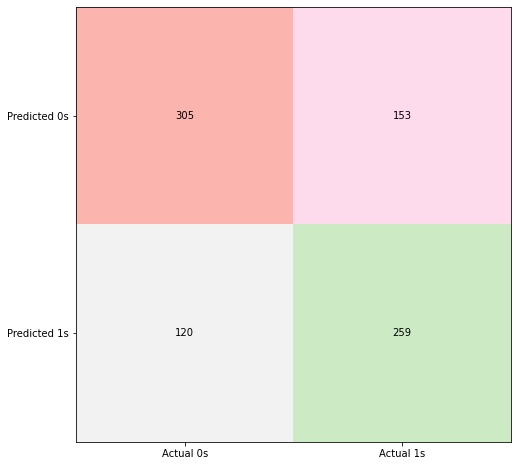

In [646]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_train, cmap='Pastel1_r')
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_train[i, j], ha='center', va='center')
plt.show()

#### Overall accuracy, recall and specificity for train data

In [647]:
print("Accuracy_train:", (cm_train[0,0]+cm_train[1,1])/len(Y0))
print("Sensitivity_train:",cm_train[1,1]/(cm_train[1,1]+cm_train[1,0]))
print("Specificity_train:",cm_train[0,0]/(cm_train[0,0]+cm_train[0,1]))

Accuracy_train: 0.6738351254480287
Sensitivity_train: 0.683377308707124
Specificity_train: 0.665938864628821


#### Confusion matrix for the test data

In [648]:
cm_test = confusion_matrix(Y1,Y1_logit).T

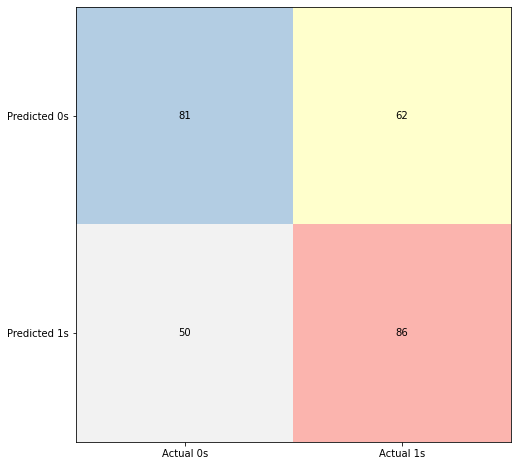

In [649]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_test, cmap='Pastel1_r')
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_test[i, j], ha='center', va='center')
plt.show()

#### Overall accuracy, recall and specificity for test data

In [650]:
print("Accuracy_test:", (cm_test[0,0]+cm_test[1,1])/len(Y1))
print("Sensitivity_test:",cm_test[1,1]/(cm_test[1,1]+cm_test[1,0]))
print("Specificity_test:",cm_test[0,0]/(cm_test[0,0]+cm_test[0,1]))

Accuracy_test: 0.5985663082437276
Sensitivity_test: 0.6323529411764706
Specificity_test: 0.5664335664335665


Accuracy alone is not a good measure to lean on when the data is not balanced. However, as the churn rate indicated our dataset is balanced (churn - 50.1%, no churn - 49.8%), hence accuracy is a reliable measure for us. As it indicates 68% of the variation in our target variable churn is being explained by our independent variables, but accuracy on test is 60% meaning our model is quite overfitted.